In [1]:
import sys
import os

# Add the src folder to the Python path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), 'src')))

import numpy as np
import matplotlib.pyplot as plt

from mesh import *
from geometry import *
import material
import cross_section
import beam_element
import structure
import solver

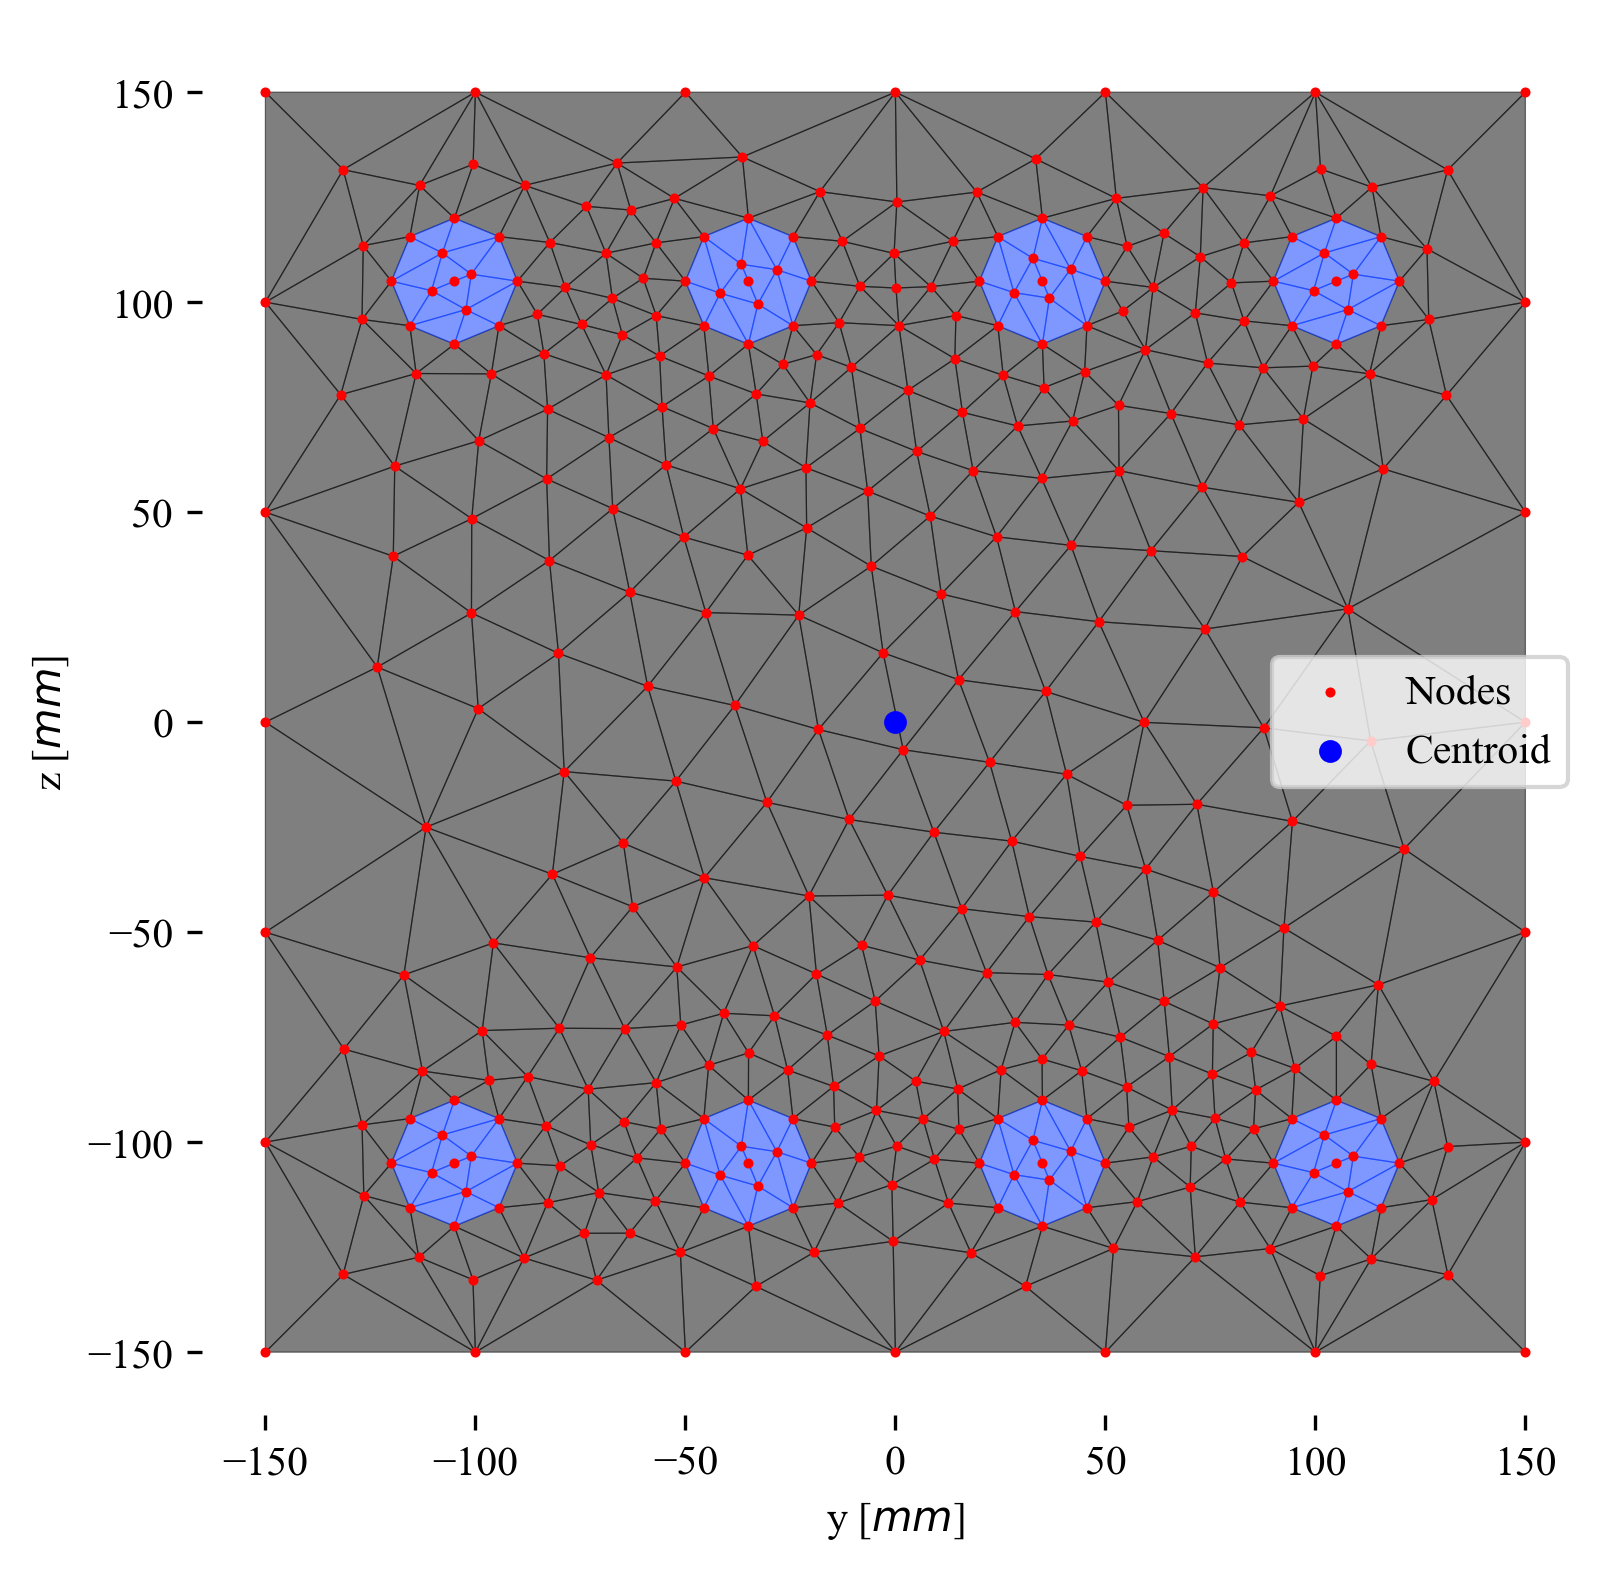

In [7]:
ReinforcedConcrete = ReinforcedConcreteColumn(width  = 300, 
                                                       height = 300, 
                                                       concrete_cover = 30,
                                                       rebar_diameter = 30,
                                                       rebar_spacing  = 50)
mesh = Mesh(ReinforcedConcrete, "triangle", 50)
mesh.plot()

In [3]:
struc = structure.Cantilever(beam   = mesh, 
						length = 2000,
						load_DOFs = [8],
						nodal_loads = [1],
						number_of_sections_per_elemnt = 6)

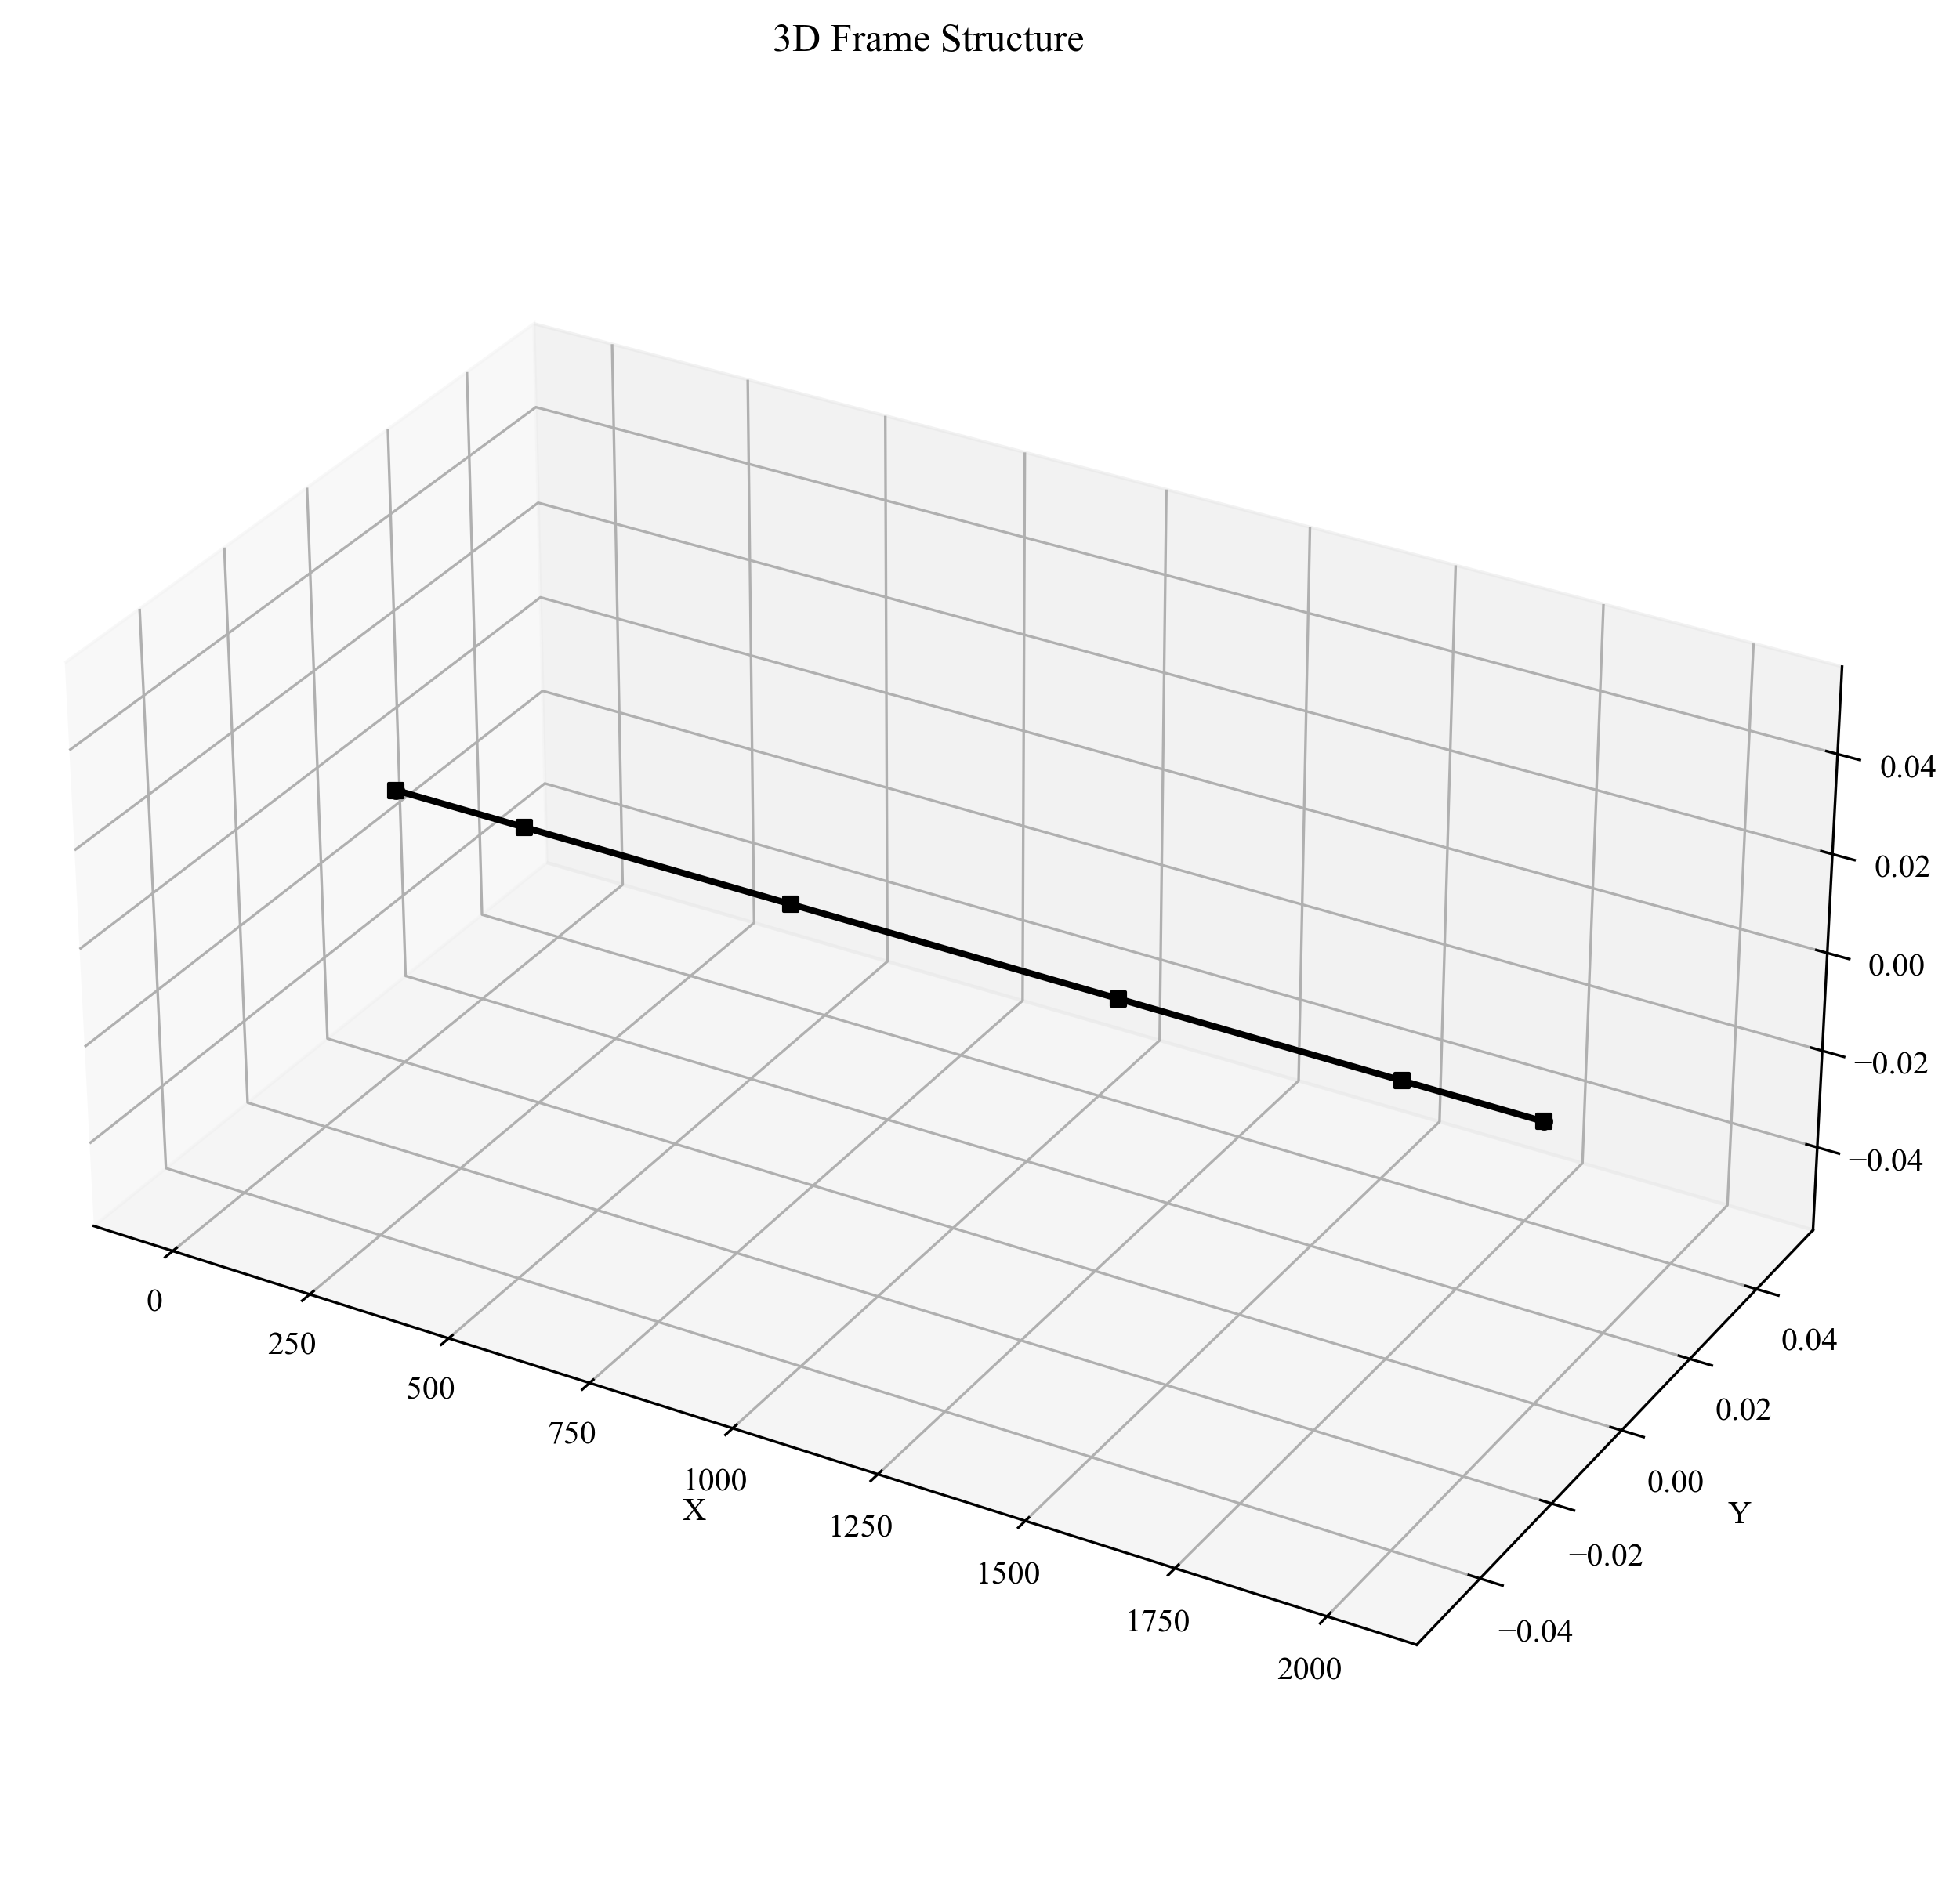

In [10]:
lin_solver = solver.Linear(struc)
lin_solver.plot_initial_structure()
non_linear_solver = solver.Nonlinear(struc, 
									 constraint="Displacement", 
									 NR_tolerance=1e-4, 
									 NR_max_iter=20, 
									 section_tolerance=1e-6, 
									 section_max_iter=100,
									 controlled_DOF = 8)

In [5]:
increments = np.zeros(110)
increments.fill(1)

u_history , lambda_history  = non_linear_solver.solve(increments)

  0%|          | 0/110 [00:00<?, ?it/s]

----------------------------------------------
Load step 1 of 110
   Attempt  1
      NR Iteration  0
         Beam Element  1
            Element iteration  0
            Element iteration  1
            Element iteration  2
            Element iteration  3
      Residuals Norm  77213.43656235897
      NR Iteration  1
         Beam Element  1
            Element iteration  0
            Element iteration  1
            Element iteration  2
            Element iteration  3
            Element iteration  4
            Element iteration  5
            Element iteration  6
      Residuals Norm  29004.25791261325
      NR Iteration  2
         Beam Element  1
            Element iteration  0
            Element iteration  1
      Residuals Norm  1359.6262099137816
      NR Iteration  3
         Beam Element  1
            Element iteration  0
      Residuals Norm  6.915300950873908e-13
NR Converged!
----------------------------------------------
Load step 2 of 110
   Attempt  1
      NR It

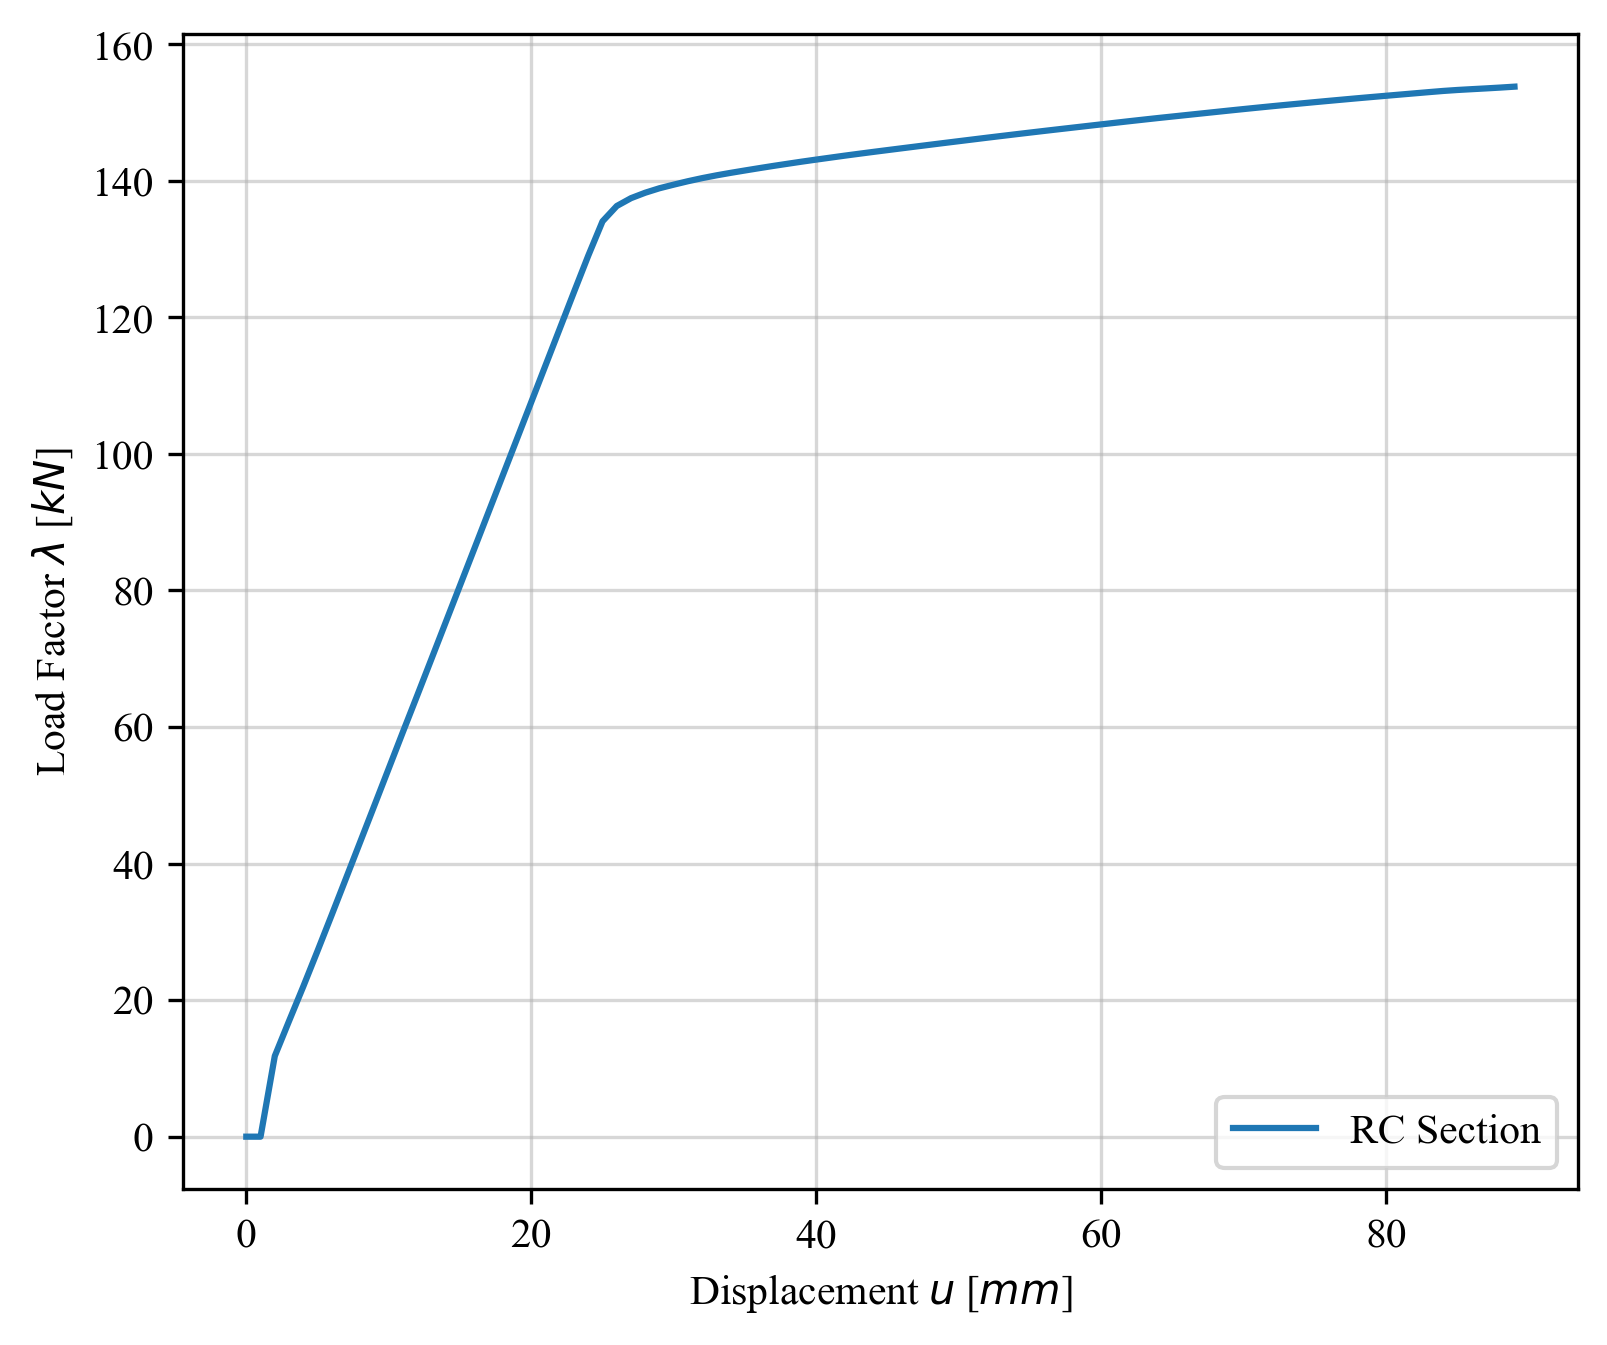

In [9]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

# Main figure and axes
fig, ax = plt.subplots(figsize=(6, 5))
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['figure.dpi'] = 300

ls=["-", (0, (3, 5, 1, 5, 1, 5)),"dashed", "dotted","-"]

ax.plot(u_history[0:90,8], lambda_history[0:90]/1000,   label="RC Section", ls=ls[0])
ax.set_xlabel("Displacement $u$ [$mm$]")
ax.set_ylabel("Load Factor $\\lambda$ [$kN$]")
ax.legend(loc="lower right")
ax.grid(alpha=0.5)

plt.show()